In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

from collections import deque

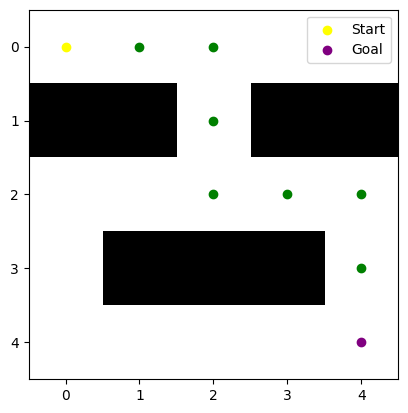

In [3]:
def bfs(maze, start, goal):
    queue = deque([(start, [])])
    visited = set()

    while queue:
        current, path = queue.popleft()
        x, y = current

        if current == goal:
            return path + [current]

        if current in visited:
            continue

        visited.add(current)

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < len(maze) and 0 <= ny < len(maze[0]) and maze[nx][ny] != 1:
                queue.append(((nx, ny), path + [current]))

    return None

def visualize_maze(maze, start, goal, path=None):
    cmap = ListedColormap(['white', 'black', 'red', 'blue', 'green'])
    bounds = [0, 0.5, 1.5, 2.5, 3.5, 4.5]
    norm = plt.Normalize(bounds[0], bounds[-1])

    fig, ax = plt.subplots()
    ax.imshow(maze, cmap=cmap, norm=norm)

    ax.scatter(start[1], start[0], color='yellow', marker='o', label='Start')
    ax.scatter(goal[1], goal[0], color='purple', marker='o', label='Goal')

    if path:
        for node in path[1:-1]:
            ax.scatter(node[1], node[0], color='green', marker='o')

    ax.legend()
    plt.show()

# Example maze
maze = np.array([
    [0, 0, 0, 0, 0],
    [1, 1, 0, 1, 1],
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
])

start = (0, 0)
goal = (4, 4)

path = bfs(maze, start, goal)

visualize_maze(maze, start, goal, path)
